This script following b summarizes the keystone species in disease group and health group in each dataset.

In [1]:
# This script following step2_cluster_analysis.ipynb summarizes the keystone species
# in disease group and control group in each dataset
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os

def key_sp(keystone_df):
    keystone_sp = list(keystone_df[(keystone_df['layer'] == 0) & (keystone_df['is_keystone']==True)].index)[0]
    return keystone_sp


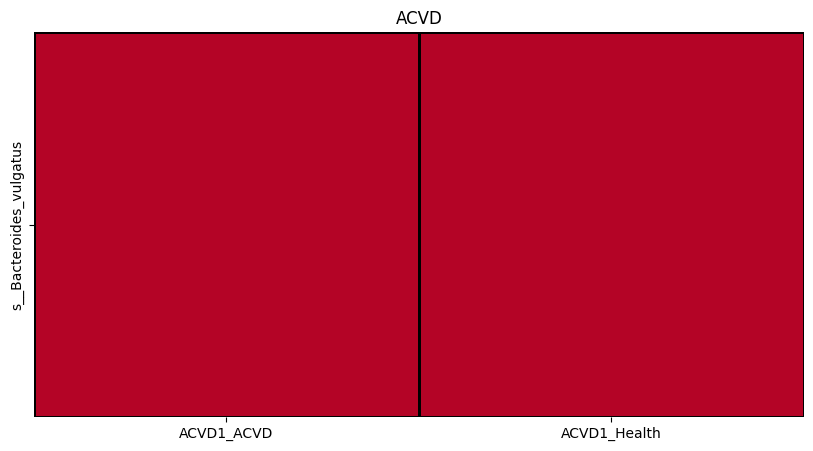

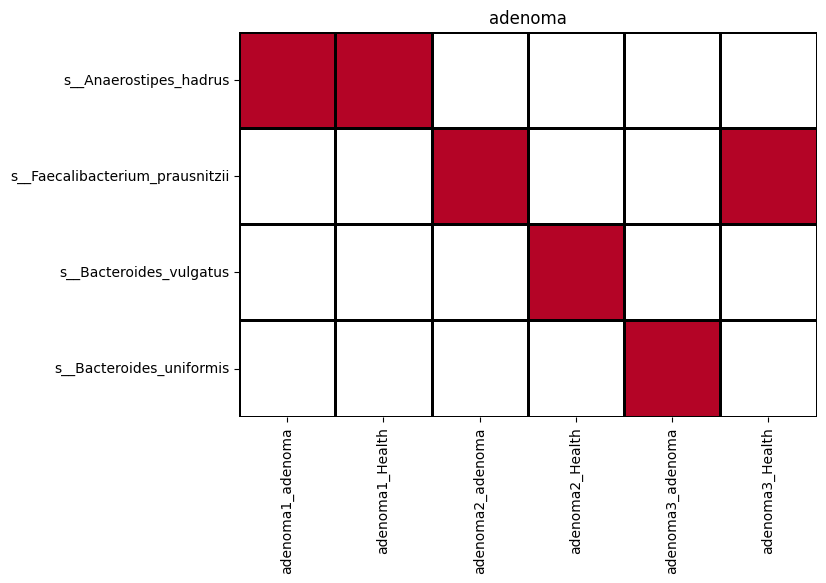

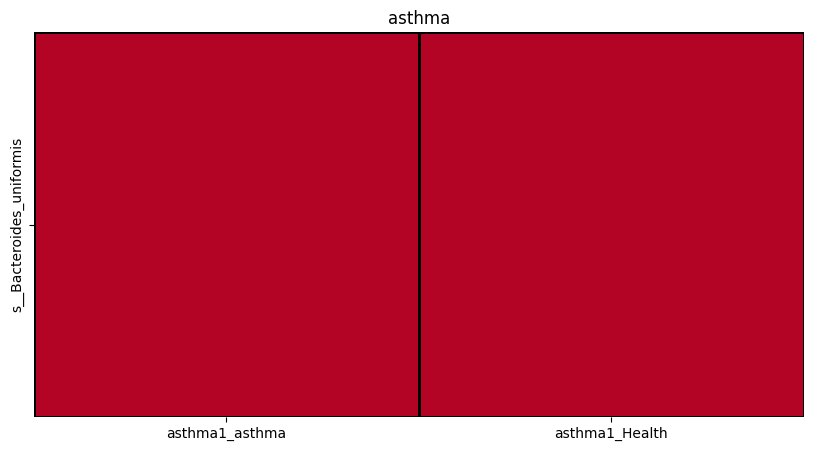

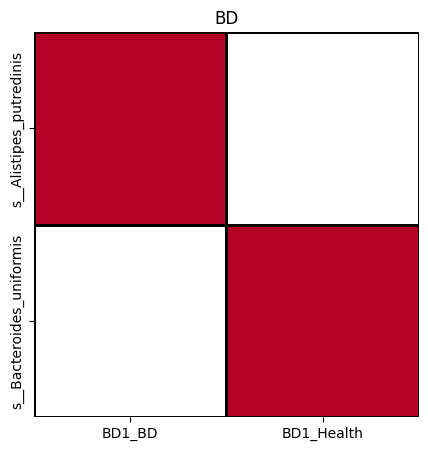

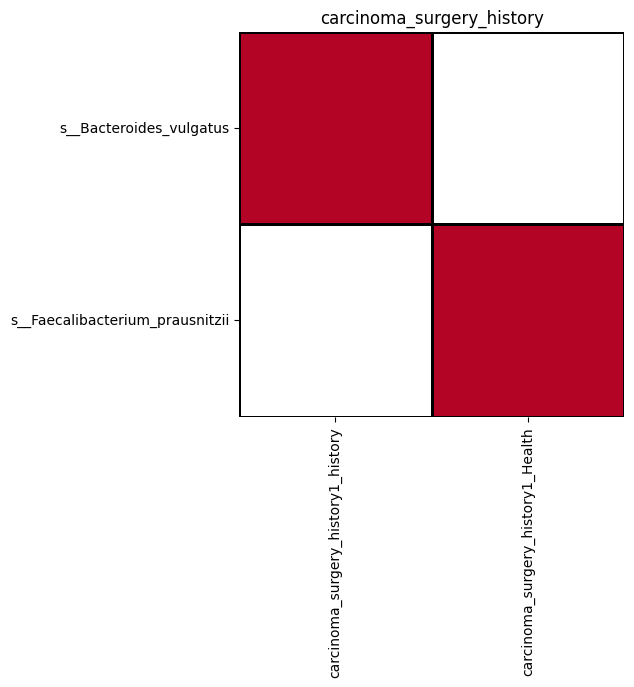

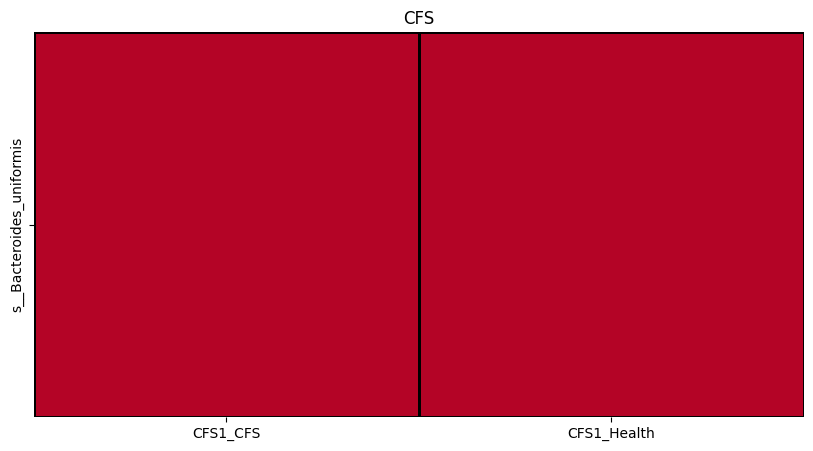

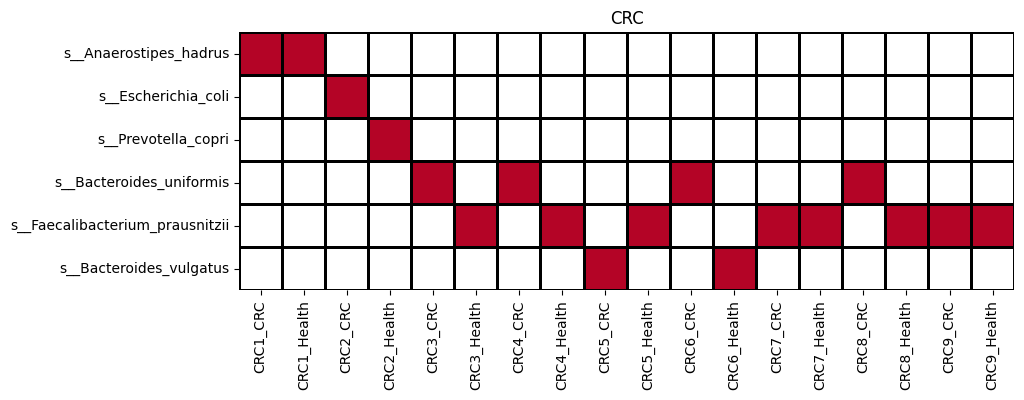

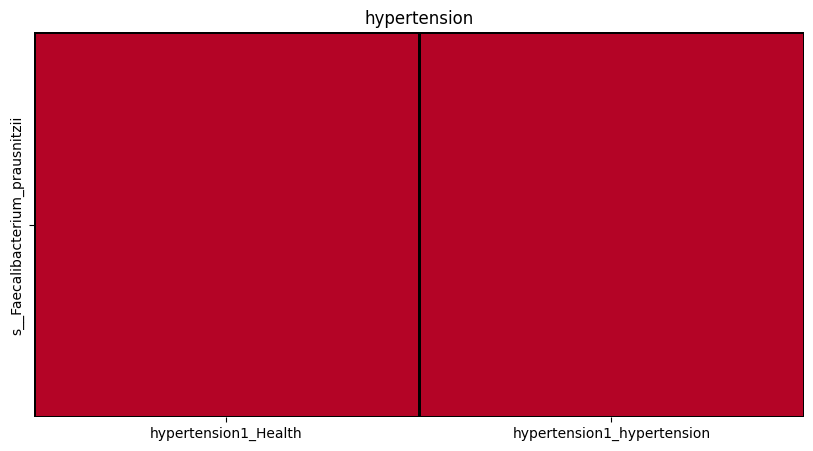

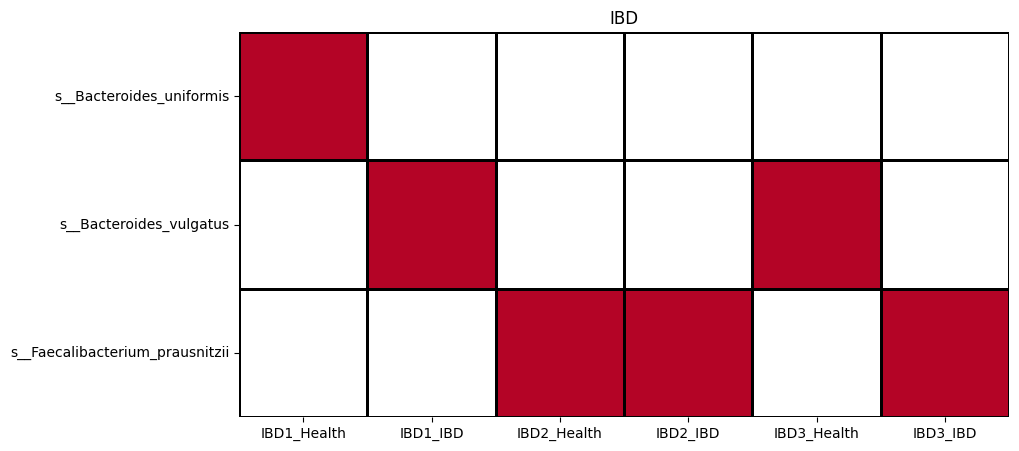

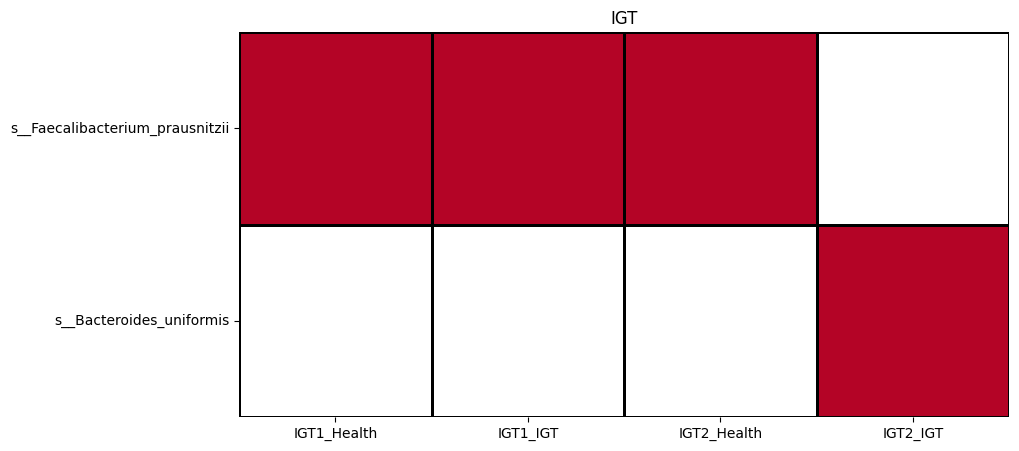

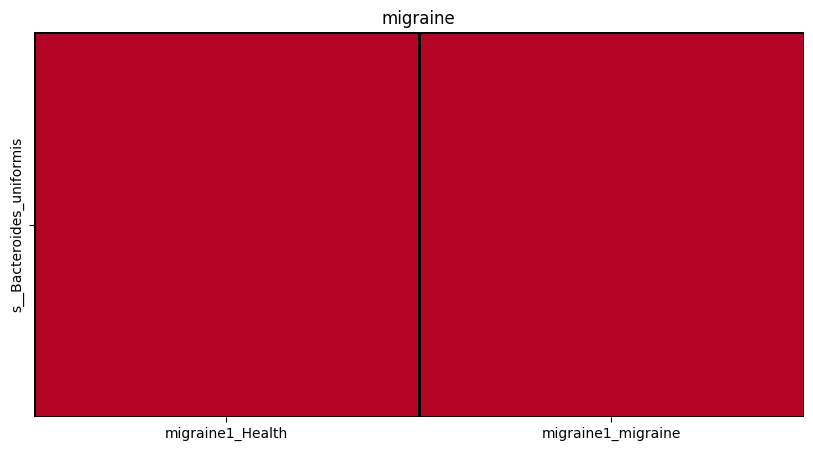

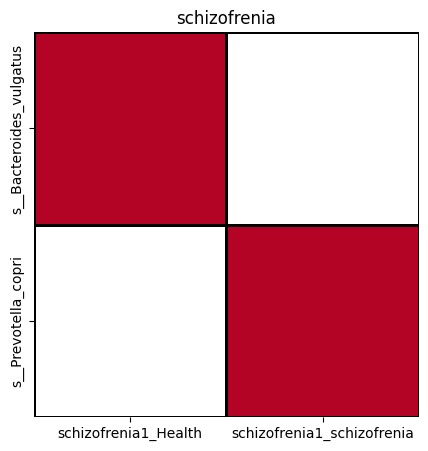

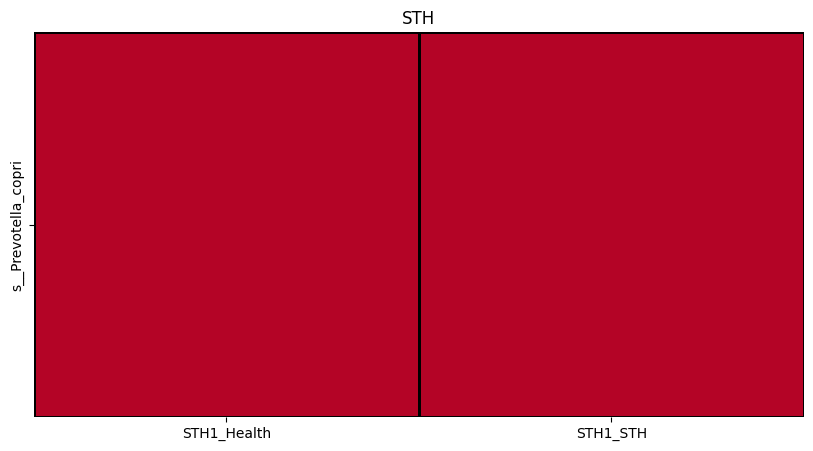

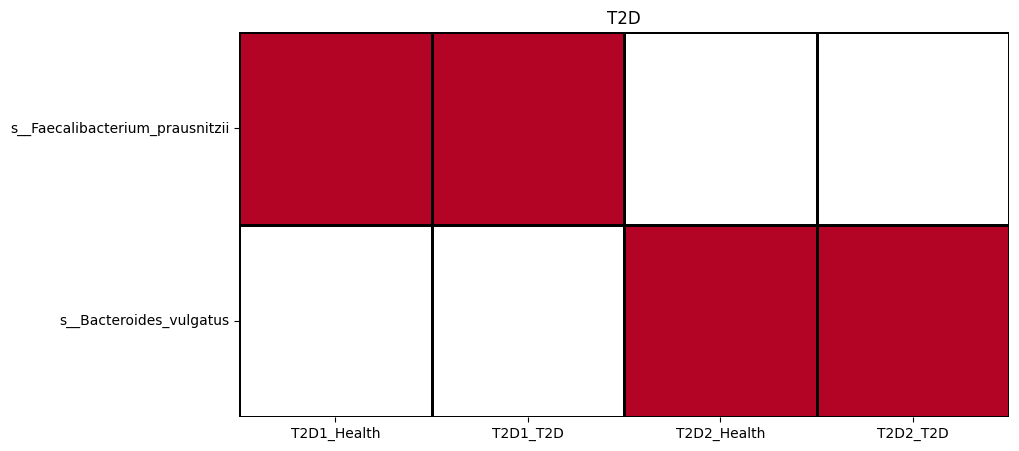

In [2]:
result = pd.DataFrame()
outer_dir = '../result/large_scale_cohort/'

for d in os.listdir(outer_dir):
    in_dir = os.path.join(outer_dir, d)
    if not os.path.isdir(in_dir):
        continue
    plt.figure(figsize=(10, 5))
    result = pd.DataFrame()
    for dir in os.listdir(in_dir):
        dir_path = os.path.join(in_dir, dir)
        if not os.path.isdir(dir_path):
            continue
        sp_dir = os.path.join(in_dir, dir, 'sp')
        for phenotype_dir in os.listdir(sp_dir):
            pheno = phenotype_dir.split('_')[-1]
            keystone_df = pd.read_csv(os.path.join(sp_dir, phenotype_dir, 'keystone_node.tsv'), sep='\t', header=0, index_col=0)
            ksp = key_sp(keystone_df)
            result.loc[ksp, '{}_{}'.format(dir, pheno)] = 1
    sns.heatmap(result, square=True, vmax=1, vmin=-1, linecolor='black', cbar=False, xticklabels=True, yticklabels=True, linewidths=1, cmap="coolwarm")
    plt.title(d)
    plt.show()
    plt.close()
            